In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nhập Input

In [2]:
# nhập hàm f(x, y)
def f(x, y):
    return np.array([(x + 2*y[0]) / (x**2 + 2*y[0]**2)])

# vị trí đầu
a = 0
# vị trí cuối
b = 3
# số mốc
n = 31
# giá trị y0
y0 = np.array([1])
# sai số
eps = 1e-4
# bậc của Adams
s = 4

In [3]:
# đọc input từ file
def doc_input(input):
    f = open(input, "r")
    a = float(f.readline())
    b = float(f.readline())
    n = int(f.readline())
    y0 = f.readline()
    y0 = y0.strip().split()
    y0 = np.array(y0, dtype=float)
    eps = float(f.readline())
    s = int(f.readline())
    f.close()
    return a, b, n, y0, eps, s

In [4]:
# hoocne nhân
def hoocne_product(x):
    #tich cua cac nghiem
    # Li luu he so da thuc sau moi lan nhan
    a = list()
    Li = [np.array([1])]
    a.append(np.array([1, 0]))
    for i in x:
        b = a[-1]
        c = list()
        c.append(1)
        for j in range(len(b) - 1):
            c.append(b[j + 1]- b[j] * i)
        c.append(0)
        a.append(np.array(c))
        Li.append(np.delete(a[-1], -1))
    return Li

In [5]:
# hoocne chia
def hoocne_quatient(a, x):
    # chia gia tri cua da thuc P(x) cho (x - x_0)
    # tra ve b và b_0 trong do:
    # b la he so cua da thuc sau khi chia
    # b_0 la phan du va la ket qua cua P(x)
    y = list()
    y.append(a[0])
    for i in range(len(a) - 1):
        y.append(y[i] * x + a[i + 1])
    b = np.array(y[:-1])
    b_0 = np.array(y[-1])
    return b, b_0

Công thức ADAMs ngoại suy bậc s
$$I_k = h\int_0^1\left(f_k + \nabla f_kt + \frac{\nabla^2f_k}{2!}t(t + 1) + ... + \frac{\nabla^{s - 1}f_k}{s!}t(t + 1)...(t + s - 2)\right)dt$$
$$y_{k+1} = y_k + I_k = y_k + h(\beta_1f_k + \beta_2f_{k-1} + ... + beta_{s}f_{k - s + 1})$$

In [6]:
# hệ số của ADAMs ngoại suy bậc s
def ABs(s):
    a = [1]
    nabla = np.zeros((s, s))
    nabla[0][0] = 1
    omega = hoocne_product(-np.arange(s - 1))
    giai_thua = 1
    print("=====================================")
    print("Bảng giá trị của tích phân:")
    for i in range(1, s):
        giai_thua *= i
        a.append(hoocne_quatient(np.concatenate((omega[i]/np.arange(i + 1, 0, -1),np.array([0]))), 1)[1] / giai_thua)
        print("I_{} = {}".format(i, hoocne_quatient(np.concatenate((omega[i]/np.arange(i + 1, 0, -1),np.array([0]))), 1)[1]))
        nabla[i][0] = 1
        for j in range(1, i):
            nabla[i][j] = nabla[i - 1][j] - nabla[i - 1][j - 1]
        nabla[i][i] = (-1)**i
    print("=====================================")
    print("Bảng giá trị của nabla: \n", nabla)
    print("=====================================")
    a = np.array(a)
    return np.dot(a, nabla)

Công thức ADAMs nội suy bậc s
$$I_k = h\int_{-1}^0\left(f_{k + 1} + \nabla f_{k + 1}t + \frac{\nabla^2f_{k + 1}}{2!}t(t + 1) + ... + \frac{\nabla^{s - 1}f_{k + 1}}{s!}t(t + 1)...(t + s - 2)\right)dt$$
$$y_{k+1} = y_k + I_k = y_k + h(\beta_1f_{k+1} + \beta_2f_{k} + ... + \beta_{s}f_{k - s +2})$$

In [7]:
# hệ số của ADAMs nội suy bậc s
def AMs(s):
    a = [1]
    nabla = np.zeros((s, s))
    nabla[0][0] = 1
    omega = hoocne_product(-np.arange(s - 1))
    giai_thua = 1
    print("=====================================")
    print("Bảng giá trị của tích phân:")
    for i in range(1, s):
        giai_thua *= i
        a.append(-hoocne_quatient(np.concatenate((omega[i]/np.arange(i + 1, 0, -1),np.array([0]))), -1)[1] / giai_thua)
        print("I_{} = {}".format(i, -hoocne_quatient(np.concatenate((omega[i]/np.arange(i + 1, 0, -1),np.array([0]))), -1)[1]))
        nabla[i][0] = 1
        for j in range(1, i):
            nabla[i][j] = nabla[i - 1][j] - nabla[i - 1][j - 1]
        nabla[i][i] = (-1)**i
    print("=====================================")
    print("Bảng giá trị của nabla: \n", nabla)
    print("=====================================")
    a = np.array(a)
    return np.dot(a, nabla)

In [8]:
# áp dụng ADAMs ngoại suy bậc s giải ptvp
def ABs_solve(a, b, y0, n, s):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = [y0]
    for i in range(0, n - 1):
        if i < s - 1:
            k1 = h * f(x[i], y[i])
            k2 = h * f(x[i] + h / 2, y[i] + k1 / 2)
            k3 = h * f(x[i] + h / 2, y[i] + k2 / 2)
            k4 = h * f(x[i] + h, y[i] + k3) 
            y.append(y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        else:
            y.append(y[i] + h*np.dot(ABs(s), np.array([f(x[i - j], y[i - j]) for j in range(s)])))
    return x, np.array(y)


In [9]:
# áp dụng ADAMs nội suy bậc s giải ptvp để hiểu chỉnh sai số
def AMs_solve(a, b, y0, n, eps, s):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = [y0]
    AB = ABs(s)
    AM = AMs(s + 1)
    for i in range(0, n - 1):
        if i < s - 1:
            k1 = h * f(x[i], y[i])
            k2 = h * f(x[i] + h / 2, y[i] + k1 / 2)
            k3 = h * f(x[i] + h / 2, y[i] + k2 / 2)
            k4 = h * f(x[i] + h, y[i] + k3)
            y.append(y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        else:
            y.append(y[i] + h*np.dot(AB, np.array([f(x[i - j], y[i - j]) for j in range(s)])))
            yTerm = y[i + 1] + 1
            k = 1
            print("--------------------")
            print("x = ", x[i + 1], "y = ", y[i + 1])
            while np.all(abs(yTerm - y[i + 1])) > eps:
                print("lần lặp thứ ", k)
                k += 1
                yTerm = np.copy(y[i + 1])
                y[i + 1] = y[i] + h*np.dot(AM, np.array([f(x[i - j], y[i - j]) for j in range(s + 1)]))
                print("y = ", y[i + 1])
    return x, np.array(y)

In [10]:
# hàm ghép trơn bậc 3
def ghep_tron_bac_3(x, y):
    S = list()
    h = list()
    m = list()
    lamda = list()
    muy = list()
    d = list()
    alpha = list()
    beta = list()
    phi = list()
    theta = list()

    lamda.append(1)
    muy.append(0)
    d.append(0)
    h.append(x[1] - x[0])

    alpha.append(0)
    beta.append(0)

    for i in range(0, len(x) - 2):
        h.append(x[i + 2] - x[i + 1])
        alpha.append(lamda[i] / (-2 - muy[i] * alpha[i]))
        beta.append((beta[i]*muy[i] - d[i])/(-2 - muy[i] * alpha[i]))
        lamda.append(h[i+1]/(h[i] + h[i+1]))
        muy.append(1 - lamda[i+1])
        d.append(6*((y[i+2] - y[i+1])/h[i+1] - (y[i+1] - y[i])/h[i])/(h[i] + h[i+1]))

    alpha.append(lamda[-1]/(-2 - muy[-1]*alpha[-1]))
    beta.append((beta[-1]*muy[-1] - d[-1])/(-2 - muy[-1]*alpha[-2]))

    lamda.append(0)
    muy.append(1)
    d.append(0)

    m.append((muy[-1]*beta[-1] - d[-1])/(-2 - muy[-1]*alpha[-1]))

    for i in range(len(x) - 2, -1, -1):
        m.append(alpha[i+1]*m[-1] + beta[i+1])
        phi.append(y[i+1]/h[i] - m[-2]*h[i]/6)
        theta.append(y[i]/h[i] - m[-1]*h[i]/6)
        s = list()
        s.append((-m[-1] + m[-2])/(6*h[i]))
        s.append((m[-1]*x[i+1] - m[-2]*x[i])/(2*h[i]))
        s.append((-m[-1]*x[i+1]**2 + m[-2]*x[i]**2)/(2*h[i]) + phi[-1] - theta[-1])
        s.append((m[-1]*x[i+1]**3 - m[-2]*x[i]**3)/(6*h[i]) - phi[-1]*x[i] + theta[-1]*x[i+1])
        S.append(np.array(s))
    S.reverse()
    return S

def hoocne_quatient(a, x):
    # chia gia tri cua da thuc P(x) cho (x - x_0)
    # tra ve b và b_0 trong do:
    # b la he so cua da thuc sau khi chia
    # b_0 la phan du va la ket qua cua P(x)
    y = list()
    y.append(a[0])
    for i in range(len(a) - 1):
        y.append(y[i] * x + a[i + 1])
    b = np.array(y[:-1])
    b_0 = np.array(y[-1])
    return b, b_0

# vẽ đồ thị
def ve_do_thi(x, y, S):
    # plt.plot(x, y, 'ro')
    for i in range(len(S)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S[i], x_0)[1]
        plt.plot(x_0, y_0, 'b')
    plt.show()

def ve_do_thi_2(x, y, S1, S2):
    # plt.plot(x, y, 'ro')
    for i in range(len(S1)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S1[i], x_0)[1]
        Y0 = plt.plot(x_0, y_0, 'r')
    for i in range(len(S2)):
        x_1 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_1 = hoocne_quatient(S2[i], x_1)[1]
        Y1 = plt.plot(x_1, y_1, 'g')
    plt.legend([Y0[0], Y1[0]], ['y[0]', 'y[1]'])
    plt.show()

    plt.plot(y[:, 0], y[:, 1], 'y')
    plt.xlabel('y[0]')
    plt.ylabel('y[1]')
    plt.show()

def ve_do_thi_3(x, y, S1, S2, S3):
    # plt.plot(x, y, 'ro')
    for i in range(len(S1)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S1[i], x_0)[1]
        Y0 = plt.plot(x_0, y_0, 'r')
    for i in range(len(S2)):
        x_1 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_1 = hoocne_quatient(S2[i], x_1)[1]
        Y1 = plt.plot(x_1, y_1, 'g')
    for i in range(len(S3)):
        x_2 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_2 = hoocne_quatient(S2[i], x_2)[1]
        Y2 = plt.plot(x_2, y_2, 'b')
    plt.legend([Y0[0], Y1[0], Y2[0]], ['y[0]', 'y[1]', 'y[2]'])
    plt.show()

    plt.plot(y[:, 0], y[:, 1], 'y')
    plt.xlabel('y[0]')
    plt.ylabel('y[1]')
    plt.show()

    plt.plot(y[:, 0], y[:, 2], 'y')
    plt.xlabel('y[0]')
    plt.ylabel('y[2]')
    plt.show()

    plt.plot(y[:, 1], y[:, 2], 'y')
    plt.xlabel('y[1]')
    plt.ylabel('y[2]')

In [11]:
bac = y0.shape[0]

Hệ số ADAMs ngoại suy bậc s

In [12]:
# in ra hệ số của ADAMs ngoại suy bậc s
print("hệ số của ADAMs ngoại suy bậc ", s, " là: ")
print(ABs(s))

hệ số của ADAMs ngoại suy bậc  4  là: 
Bảng giá trị của tích phân:
I_1 = 0.5
I_2 = 0.8333333333333333
I_3 = 2.25
Bảng giá trị của nabla: 
 [[ 1.  0.  0.  0.]
 [ 1. -1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 1. -3.  3. -1.]]
[ 2.29166667 -2.45833333  1.54166667 -0.375     ]


Hệ số ADAMs nội duy bậc s

In [13]:
# in ra hệ số của ADAMs nội suy bậc s
print("hệ số của ADAMs nội suy bậc s")
print(AMs(s + 1))

hệ số của ADAMs nội suy bậc s
Bảng giá trị của tích phân:
I_1 = -0.5
I_2 = -0.16666666666666669
I_3 = -0.25
I_4 = -0.6333333333333337
Bảng giá trị của nabla: 
 [[ 1.  0.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 1. -3.  3. -1.  0.]
 [ 1. -4.  6. -4.  1.]]
[ 0.34861111  0.89722222 -0.36666667  0.14722222 -0.02638889]


Kết quả ADAMs ngoại suy bậc s giải ptvp

ứng dụng ADAMs ngoại suy bậc s giải ptvp
Bảng giá trị của tích phân:
I_1 = 0.5
I_2 = 0.8333333333333333
I_3 = 2.25
Bảng giá trị của nabla: 
 [[ 1.  0.  0.  0.]
 [ 1. -1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 1. -3.  3. -1.]]
Bảng giá trị của tích phân:
I_1 = 0.5
I_2 = 0.8333333333333333
I_3 = 2.25
Bảng giá trị của nabla: 
 [[ 1.  0.  0.  0.]
 [ 1. -1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 1. -3.  3. -1.]]
Bảng giá trị của tích phân:
I_1 = 0.5
I_2 = 0.8333333333333333
I_3 = 2.25
Bảng giá trị của nabla: 
 [[ 1.  0.  0.  0.]
 [ 1. -1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 1. -3.  3. -1.]]
Bảng giá trị của tích phân:
I_1 = 0.5
I_2 = 0.8333333333333333
I_3 = 2.25
Bảng giá trị của nabla: 
 [[ 1.  0.  0.  0.]
 [ 1. -1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 1. -3.  3. -1.]]
Bảng giá trị của tích phân:
I_1 = 0.5
I_2 = 0.8333333333333333
I_3 = 2.25
Bảng giá trị của nabla: 
 [[ 1.  0.  0.  0.]
 [ 1. -1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 1. -3.  3. -1.]]
Bảng giá trị của tích phân:
I_1 = 0.5
I_2 = 0.8333333333333333
I_3 = 2.25


C:\Users\Admin\AppData\Local\Temp\ipykernel_2552\1082698960.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array(y[:-1])


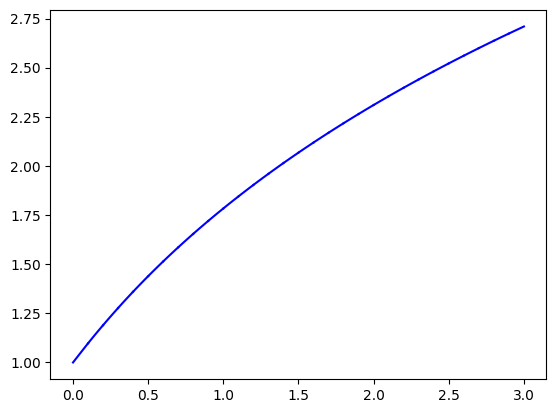

In [14]:
# ứng dụng ADAMs ngoại suy bậc s giải ptvp
print("ứng dụng ADAMs ngoại suy bậc s giải ptvp")
x, y = ABs_solve(a, b, y0, n, s)
print("=========================================")
if bac == 1:
    print(np.concatenate((x, y[:, 0])).reshape(2, n).T)
    print("=====================================")
    S = ghep_tron_bac_3(x, y[:, 0])
    ve_do_thi(x, y, S)
elif bac == 2:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1])))).reshape(3, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    ve_do_thi_2(x, y, S1, S2)
elif bac == 3:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1], y[:, 2])))).reshape(4, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    S3 = ghep_tron_bac_3(x, y[:, 2])
    ve_do_thi_3(x, y, S1, S2, S3)
# print("=====================================")
# while True:
#     x_0 = float(input("Nhập x_0: "))
#     location = 0
#     for i in range(x.shape[0] - 1):
#         if x[i] <= x_0 and x_0 <= x[i + 1]:
#             location = i
#             break
#     print("y({}) = ".format(x_0), hoocne_quatient(S[location], x_0)[1])

Kết quả ADAMs nội suy bậc s giải ptvp

ứng dụng ADAMs nội suy bậc s giải ptvp để hiểu chỉnh sai số
Bảng giá trị của tích phân:
I_1 = 0.5
I_2 = 0.8333333333333333
I_3 = 2.25
Bảng giá trị của nabla: 
 [[ 1.  0.  0.  0.]
 [ 1. -1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 1. -3.  3. -1.]]
Bảng giá trị của tích phân:
I_1 = -0.5
I_2 = -0.16666666666666669
I_3 = -0.25
I_4 = -0.6333333333333337
Bảng giá trị của nabla: 
 [[ 1.  0.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 1. -3.  3. -1.  0.]
 [ 1. -4.  6. -4.  1.]]
--------------------
x =  0.4 y =  [1.36026535]
lần lặp thứ  1
y =  [1.36628372]
lần lặp thứ  2
y =  [1.36628429]
lần lặp thứ  3
y =  [1.36628429]
lần lặp thứ  4
y =  [1.36628429]
lần lặp thứ  5
y =  [1.36628429]
--------------------
x =  0.5 y =  [1.44429297]
lần lặp thứ  1
y =  [1.4491083]
lần lặp thứ  2
y =  [1.4491083]
--------------------
x =  0.6000000000000001 y =  [1.52389201]
lần lặp thứ  1
y =  [1.52742406]
lần lặp thứ  2
y =  [1.52742406]
--------------------
x =  0.7000000000000001 y =  [1.59844405]


C:\Users\Admin\AppData\Local\Temp\ipykernel_2552\1082698960.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array(y[:-1])


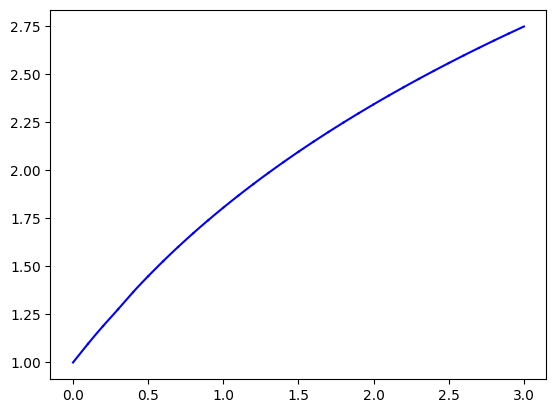

In [15]:
# ứng dụng ADAMs nội suy bậc s giải ptvp để hiểu chỉnh sai số
print("ứng dụng ADAMs nội suy bậc s giải ptvp để hiểu chỉnh sai số")
x, y = AMs_solve(a, b, y0, n, eps, s)
print("=========================================")
if bac == 1:
    print(np.concatenate((x, y[:, 0])).reshape(2, n).T)
    print("=====================================")
    S = ghep_tron_bac_3(x, y[:, 0])
    ve_do_thi(x, y, S)
elif bac == 2:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1])))).reshape(3, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    ve_do_thi_2(x, y, S1, S2)
elif bac == 3:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1], y[:, 2])))).reshape(4, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    S3 = ghep_tron_bac_3(x, y[:, 2])
    ve_do_thi_3(x, y, S1, S2, S3)
# print("=====================================")
# while True:
#     x_0 = float(input("Nhập x_0: "))
#     location = 0
#     for i in range(x.shape[0] - 1):
#         if x[i] <= x_0 and x_0 <= x[i + 1]:
#             location = i
#             break
#     print("y({}) = ".format(x_0), hoocne_quatient(S[location], x_0)[1])

Thuật toán:\
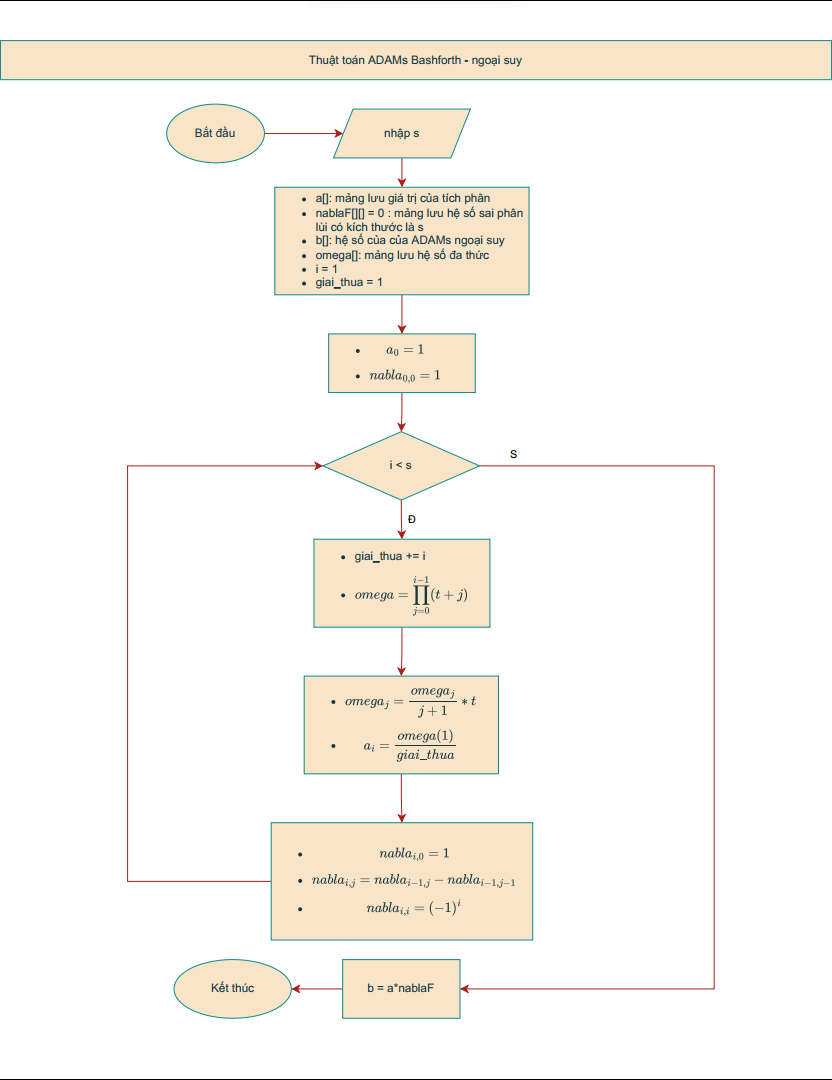\
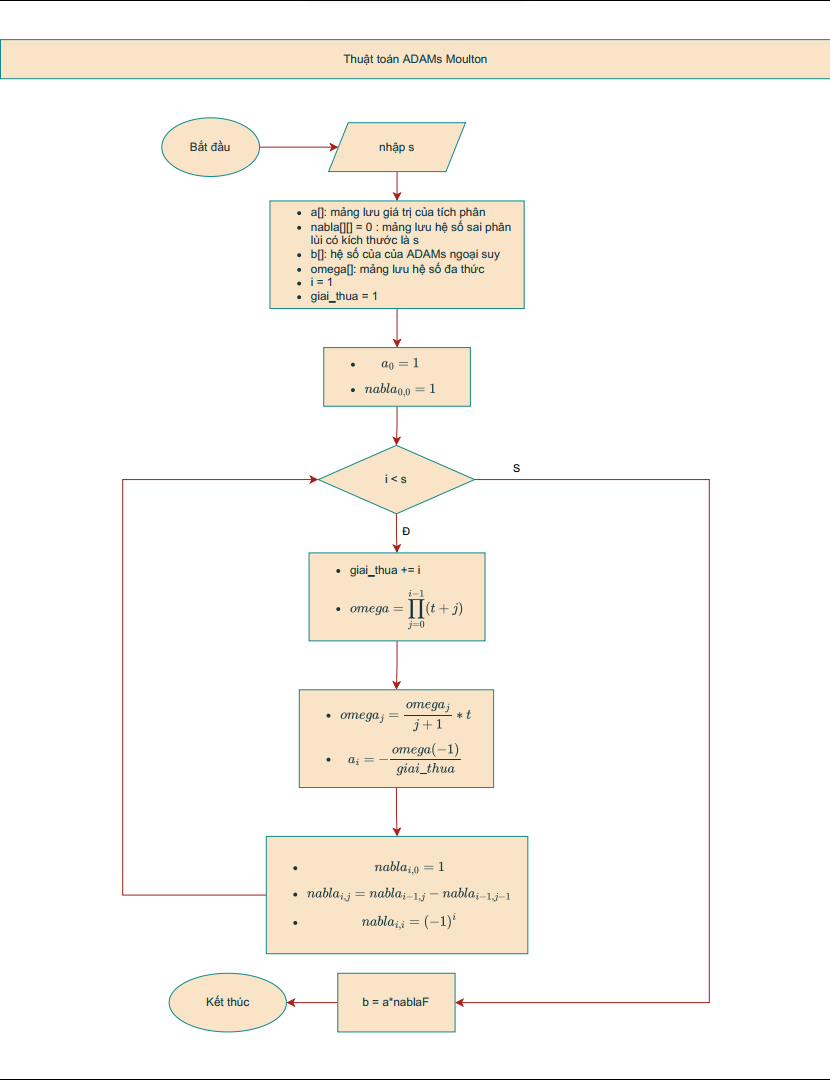\
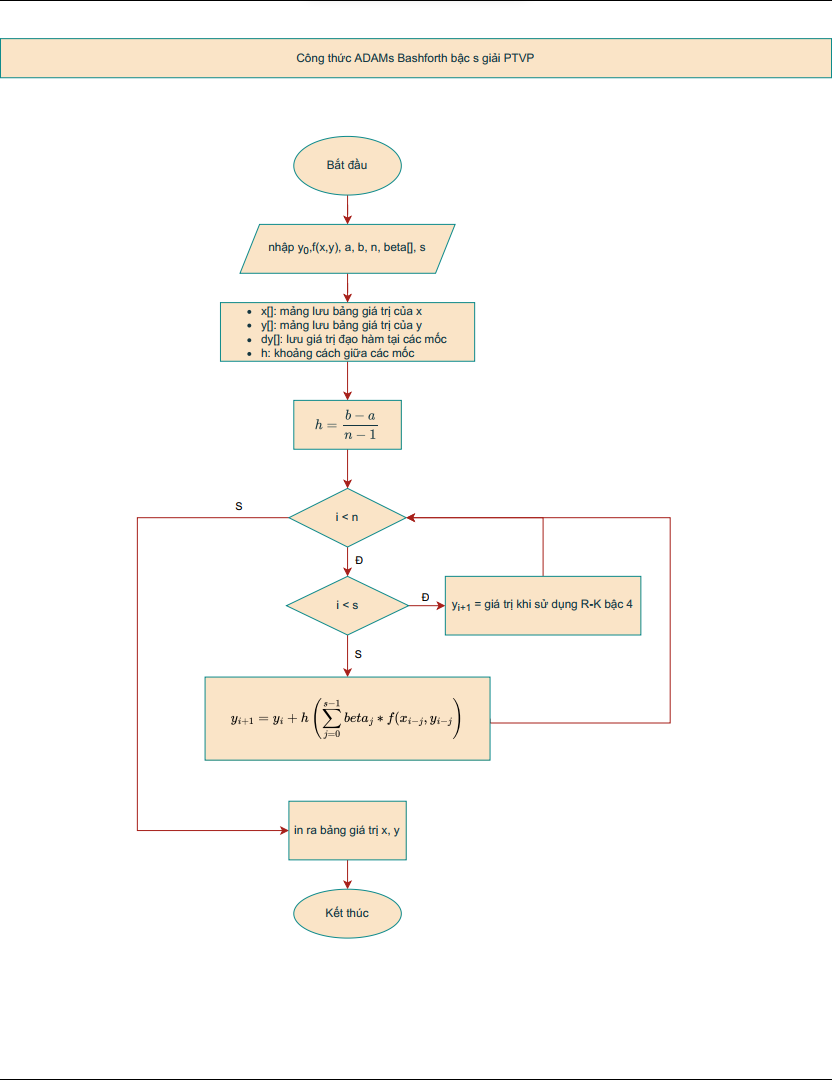\
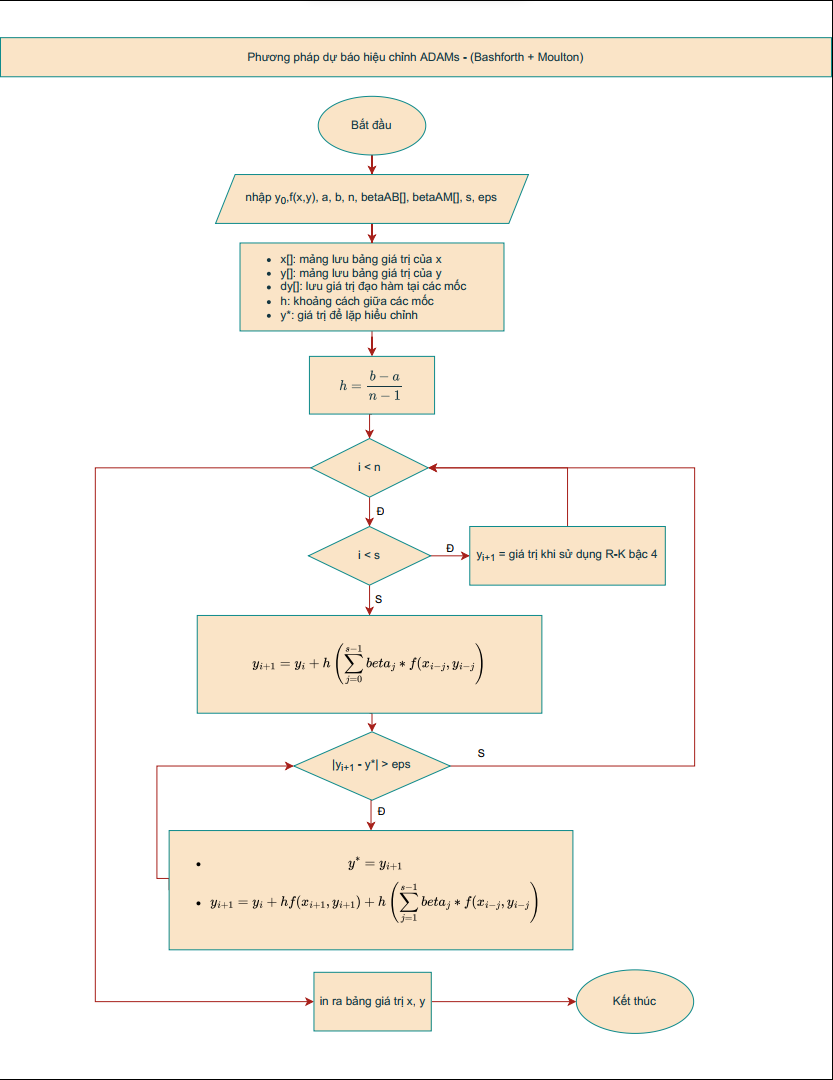